In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("./sanfrancisco_incidents_summer_2014.csv", parse_dates=['Date'])

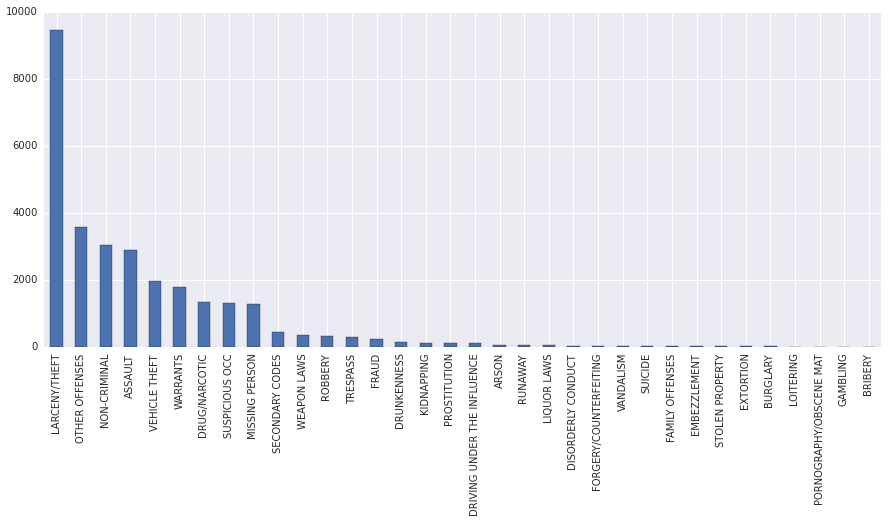

In [11]:
## Larceny / theft is the most common crime
data.Category.value_counts().plot(kind='bar', figsize=(15, 6))

In [ ]:
## only look at Larceny/theft

In [12]:
df = data[data['Category'] == 'LARCENY/THEFT']

In [20]:
df.loc[:, 'dow'] = df.Date.map(lambda x: x.dayofweek)

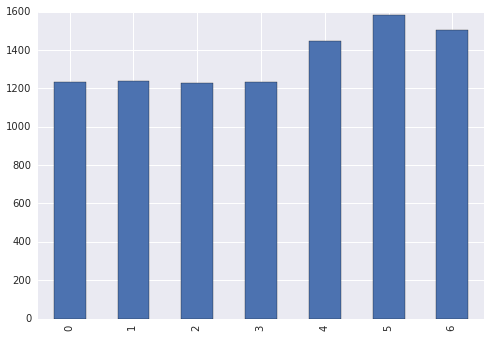

In [28]:
## more theft on weekends (fri - sun)
df.dow.value_counts().sort_index().plot(kind='bar')

In [30]:
df.loc[:, 'HourOfDay'] = df.Time.apply(lambda x: x.split(':')[0])

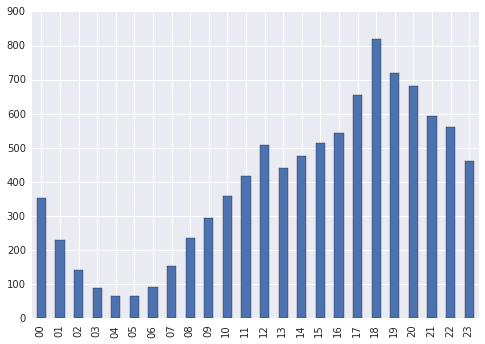

In [33]:
## peak at night
df.HourOfDay.value_counts().sort_index().plot(kind='bar')

In [37]:
by_dow = df.pivot_table(values='IncidntNum', index='dow', columns='HourOfDay', aggfunc='count')

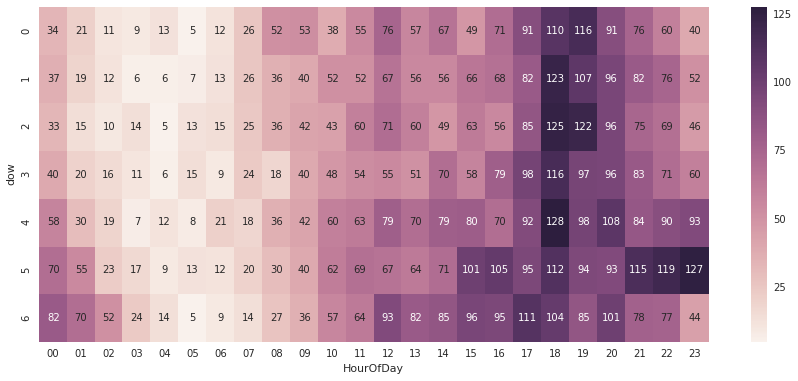

In [41]:
## distribution on sat is different, afternoon and late night
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(by_dow, ax=ax, annot=True, fmt='d')

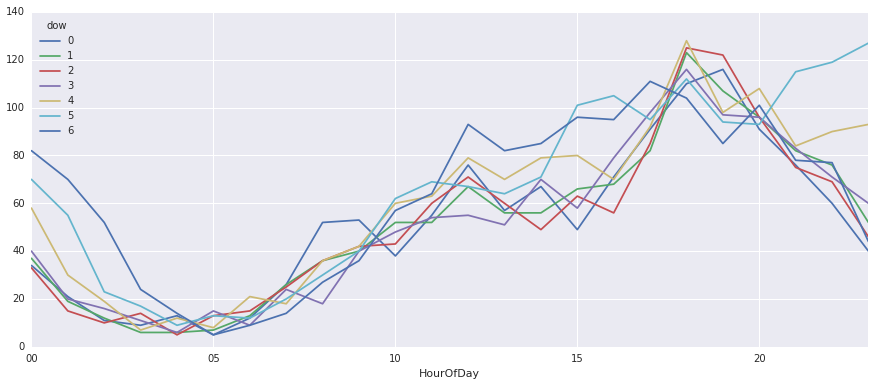

In [48]:
by_dow.T.plot(figsize=(15, 6))

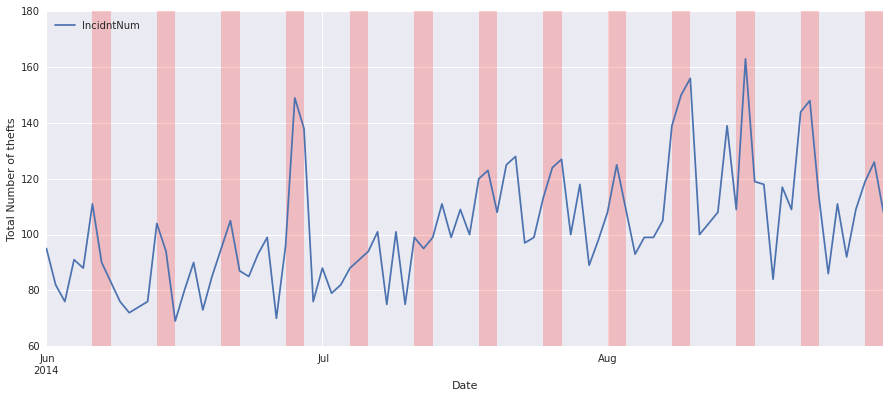

In [64]:
## check timeline - the highest few points all fall on weekend
ax = df.groupby('Date').count().plot(y='IncidntNum', figsize=(15, 6))
ax.set_ylabel('Total Number of thefts')
for i in df.groupby('Date').count().index:
    if i.weekday() > 4:
        ax.axvspan(i - pd.Timedelta('1days'), i, facecolor='red', edgecolor='none', alpha=.2)
#         ax.axvline(i, color='r', alpha=0.5)
